NAME: OKPARAJI STANLEY UDODIRI

EMAIL: okparajistanley9@gmail

HAMOYE ID: 14548b1b7c81f000

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
#import dataframe
df=pd.read_csv("https://github.com/HamoyeHQ/HDSC-Time-series-analysis-and-forecast/files/7768846/Time_series_analysis_and_forecast_DATASET.csv")
df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [65]:
df.isnull().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

**Question 11**

In [66]:
#convert column to datetime
df["FullDate"] = pd.to_datetime(df["FullDate"]) 
df.set_index("FullDate", inplace=True)

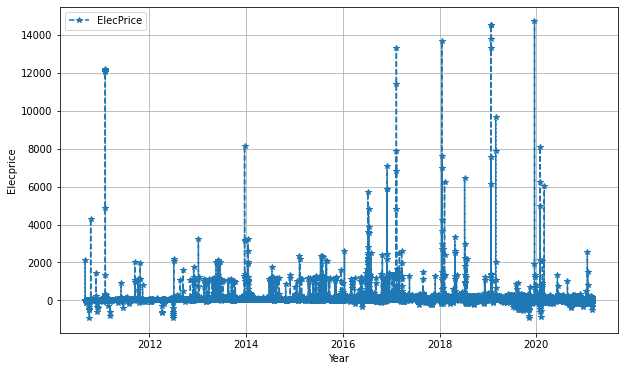

In [67]:
df2 = df.resample('D').sum()
plt.figure(figsize=(10,6))
plt.plot(df.index, df.ElecPrice, '--', marker='*', label='ElecPrice')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Elecprice')
plt.legend()

Question 12

In [68]:
from statsmodels.tsa.stattools import adfuller
p_value_1 = adfuller(df2['SysLoad'])
print(f'p-value for SysLoad: {round(p_value_1[1],6)}')

p-value for SysLoad: 0.004254


In [69]:
p_value_2 = adfuller(df2['GasPrice'])
print(f'p-value for GasPrice: {round(p_value_2[1],6)}')

p-value for GasPrice: 0.045027


In [70]:
print(round(p_value_1[1],6),round(p_value_2[1],6))

0.004254 0.045027


Question 13

In [71]:
#perform Augmented Dickey-Fuller test for GasPrice
result = adfuller(df2['GasPrice'])
print('critical values for GasPrice are: ')
for k, v in result[4].items():
    print(f'{k} : {round(v,4)}')

critical values for GasPrice are: 
1% : -3.4321
5% : -2.8623
10% : -2.5672


In [72]:
#perform Augmented Dickey-Fuller test for ElecPrice
result = adfuller(df2['ElecPrice'])
print('critical values for ElecPrice are: ')
for k, v in result[4].items():
    print(f'{k} : {round(v,4)}')

critical values for ElecPrice are: 
1% : -3.4321
5% : -2.8623
10% : -2.5672


In [73]:
-2.5672,-2.8623

(-2.5672, -2.8623)

Question 14

In [74]:
df_daily = df.resample("D").sum()
Train_set = df_daily[:2757]
Test_set = df_daily[2757:]

In [75]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3834 entries, 2010-09-01 to 2021-02-28
Freq: D
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tmax       3834 non-null   float64
 1   SysLoad    3834 non-null   float64
 2   GasPrice   3834 non-null   float64
 3   ElecPrice  3834 non-null   float64
dtypes: float64(4)
memory usage: 149.8 KB


In [76]:
Train_set_reset = Train_set.reset_index()
Test_set_reset = Test_set.reset_index()
Train_set_reset.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [77]:
#rename columns to "ds" and "y" respectively
Train_set_reset = Train_set_reset.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
Test_set_reset = Test_set_reset.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
Train_set_reset.head()

,ds,Tmax,SysLoad,GasPrice,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [78]:
training_data = Train_set_reset.iloc[:,0:5:4]
training_data.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [79]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2757 entries, 0 to 2756
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2757 non-null   datetime64[ns]
 1   y       2757 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.2 KB


In [80]:
testing_data = Test_set_reset.iloc[:,0:5:4]
testing_data.head()

,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [81]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1077 non-null   datetime64[ns]
 1   y       1077 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.0 KB


In [82]:
pip install Cython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:
pip install pystan==2.18.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [84]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
from fbprophet import Prophet
model = Prophet()
model.fit(training_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [86]:
forecast = model.predict(testing_data)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2691.764386,167.827793,5096.490224,2691.764386,2691.764386,-155.426892,-155.426892,-155.426892,9.749221,9.749221,9.749221,-165.176114,-165.176114,-165.176114,0.0,0.0,0.0,2536.337494
1,2018-03-21,2692.580955,408.988072,5056.884000,2692.580955,2692.580955,-2.925496,-2.925496,-2.925496,159.308129,159.308129,159.308129,-162.233625,-162.233625,-162.233625,0.0,0.0,0.0,2689.655459
2,2018-03-22,2693.397524,331.003081,4993.065075,2693.397524,2693.397524,95.308217,95.308217,95.308217,257.036327,257.036327,257.036327,-161.728110,-161.728110,-161.728110,0.0,0.0,0.0,2788.705741
3,2018-03-23,2694.214093,257.337127,4945.005171,2694.214093,2694.214093,-113.236873,-113.236873,-113.236873,50.257478,50.257478,50.257478,-163.494350,-163.494350,-163.494350,0.0,0.0,0.0,2580.977221
4,2018-03-24,2695.030663,-213.991670,4560.472658,2695.030663,2695.030663,-438.662722,-438.662722,-438.662722,-271.372061,-271.372061,-271.372061,-167.290660,-167.290660,-167.290660,0.0,0.0,0.0,2256.367941


In [87]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']].head()

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2018-03-20,2536.337494,167.827793,5096.490224,2691.764386,2691.764386,2691.764386
1,2018-03-21,2689.655459,408.988072,5056.884000,2692.580955,2692.580955,2692.580955
2,2018-03-22,2788.705741,331.003081,4993.065075,2693.397524,2693.397524,2693.397524
3,2018-03-23,2580.977221,257.337127,4945.005171,2694.214093,2694.214093,2694.214093
4,2018-03-24,2256.367941,-213.991670,4560.472658,2695.030663,2695.030663,2695.030663


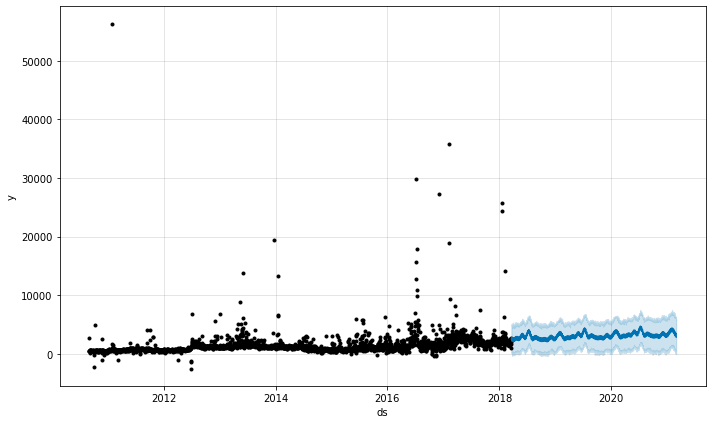

In [88]:
model.plot(forecast)
plt.show()

In [89]:
from sklearn import metrics
def Metric(y_true,y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) *100

In [90]:
MAPE = Metric(testing_data['y'],forecast['yhat'])
print(round(MAPE,2))

549.48


Question 15

In [91]:
RMSE = np.sqrt(metrics.mean_squared_error(testing_data['y'],forecast['yhat']))
round(RMSE,2)

3218.16

Question 16

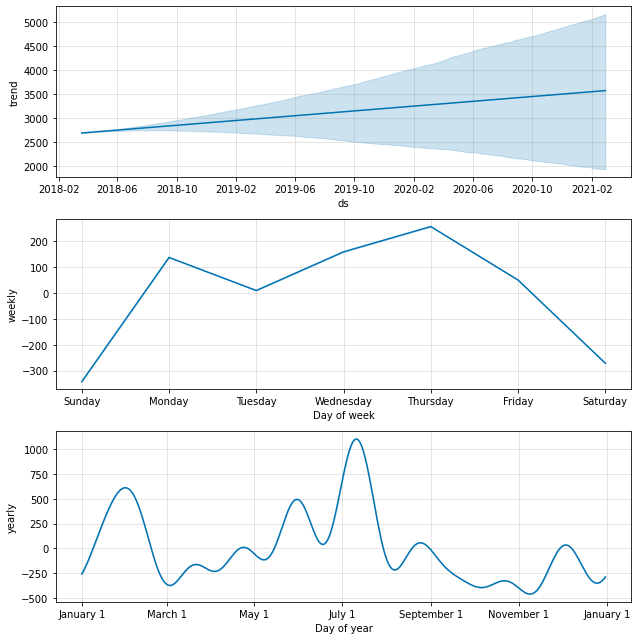

In [92]:
model.plot_components(forecast);

Question 17

In [93]:
df_daily.reset_index(inplace=True)
df_daily.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [94]:
data_reset_2 = df_daily.rename(columns={"FullDate":"ds", "SysLoad":"add1","Tmax":"add2", "GasPrice":"add3","ElecPrice":"y"})
data_reset_2.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [95]:
Train_set = data_reset_2[:2757]
Test_set = data_reset_2[2757:]

In [96]:
model = Prophet(daily_seasonality=True)
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')

model = model.fit(Train_set)
forecast_2 = model.predict(Test_set)
forecast_2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,3268.942418,-219.091343,4035.477834,3268.942418,3268.942418,-854.754479,-854.754479,-854.754479,0.237040,...,-84.326417,-84.326417,-84.326417,-40.213078,-40.213078,-40.213078,0.0,0.0,0.0,1986.263743
1,2018-03-21,3269.634328,-246.432195,4119.041491,3269.634328,3269.634328,-1024.445209,-1024.445209,-1024.445209,0.234228,...,42.684136,42.684136,42.684136,-30.966262,-30.966262,-30.966262,0.0,0.0,0.0,1977.910897
2,2018-03-22,3270.326239,745.478467,5174.412011,3270.326239,3270.326239,-214.551398,-214.551398,-214.551398,0.220600,...,145.823993,145.823993,145.823993,-25.971826,-25.971826,-25.971826,0.0,0.0,0.0,2896.617284
3,2018-03-23,3271.018150,330.765143,4858.582664,3271.018150,3271.018150,-274.376055,-274.376055,-274.376055,0.212597,...,-44.154952,-44.154952,-44.154952,-25.088361,-25.088361,-25.088361,0.0,0.0,0.0,2580.962479
4,2018-03-24,3271.710060,-872.409346,3602.745961,3271.710060,3271.710060,-1074.395558,-1074.395558,-1074.395558,0.210650,...,-117.816868,-117.816868,-117.816868,-28.065110,-28.065110,-28.065110,0.0,0.0,0.0,1435.495448


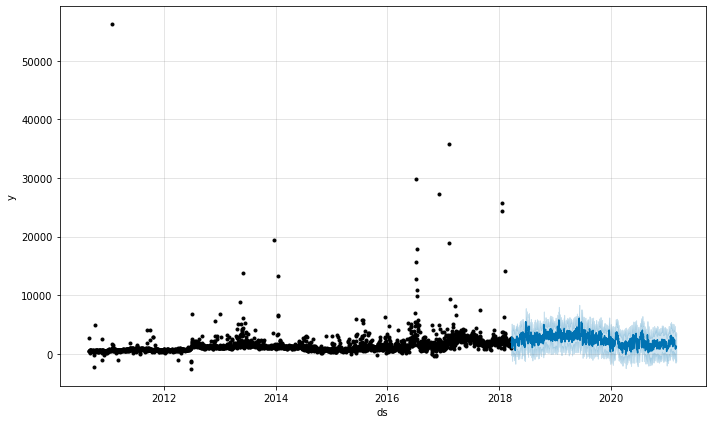

In [97]:
model.plot(forecast_2)
plt.show()

In [98]:
def Metric(y_true,y_pred):
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) *100
MAPE = Metric(Test_set['y'],forecast_2['yhat'])
round(MAPE,2)

232.77

Question 18

In [99]:
RMSE = np.sqrt(metrics.mean_squared_error(Test_set['y'],forecast_2['yhat']))
round(RMSE,2)

2708.4

Question 19

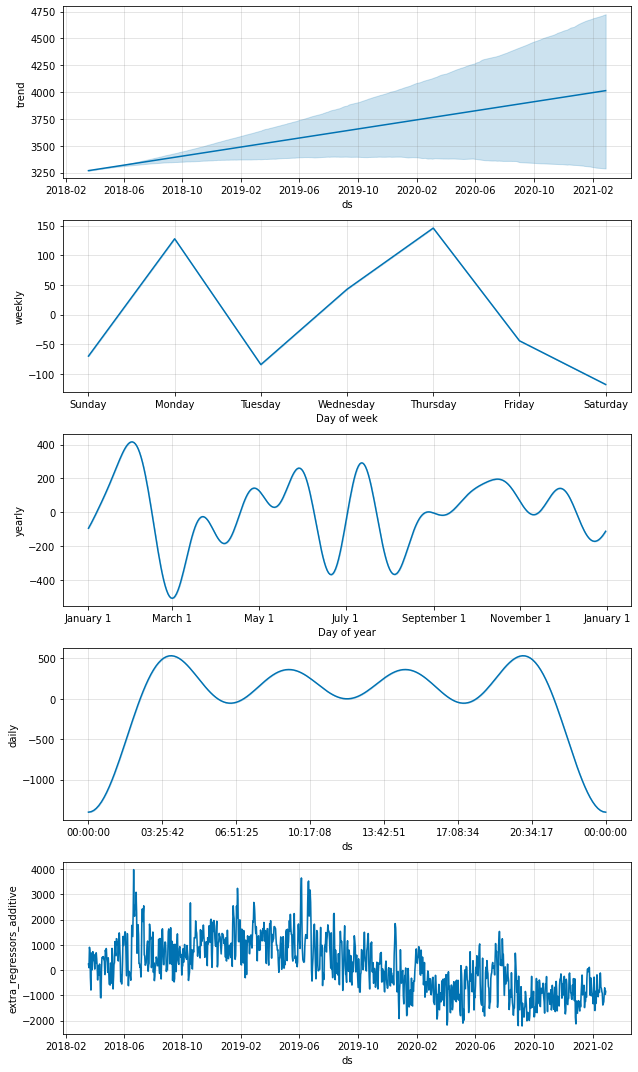

In [100]:
model.plot_components(forecast_2);

Question 20

In [101]:
train_df_2 = df_daily[["FullDate", "SysLoad", "GasPrice","ElecPrice"]]
train_df_2.head()

,FullDate,SysLoad,GasPrice,ElecPrice
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [102]:
#rename columns
train_df_2 = train_df_2.rename(columns={"FullDate": "ds", "SysLoad": "add1", "GasPrice": "add3","ElecPrice": "y" })
train_df_2.head()

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [103]:
Train_set = train_df_2[:2757]
Test_set = train_df_2[2757:]

In [104]:
model = Prophet(daily_seasonality=True)
model.add_regressor('add1')
model.add_regressor('add3')

model = model.fit(Train_set)
forecast_3 = model.predict(Test_set)
forecast_3.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add3,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,3278.817513,-127.071152,4284.970115,3278.817513,3278.817513,-856.350356,-856.350356,-856.350356,1099.698082,...,-84.293500,-84.293500,-84.293500,-38.484584,-38.484584,-38.484584,0.0,0.0,0.0,1993.029329
1,2018-03-21,3279.521018,-74.773558,4234.724402,3279.521018,3279.521018,-1026.357908,-1026.357908,-1026.357908,1124.133587,...,42.707545,42.707545,42.707545,-29.170919,-29.170919,-29.170919,0.0,0.0,0.0,1984.475494
2,2018-03-22,3280.224522,760.941444,5054.337140,3280.224522,3280.224522,-214.951978,-214.951978,-214.951978,1124.133587,...,145.241846,145.241846,145.241846,-24.110930,-24.110930,-24.110930,0.0,0.0,0.0,2904.179219
3,2018-03-23,3280.928026,512.964654,4958.626781,3280.928026,3280.928026,-274.888331,-274.888331,-274.888331,1056.593148,...,-44.136199,-44.136199,-44.136199,-23.163588,-23.163588,-23.163588,0.0,0.0,0.0,2588.975230
4,2018-03-24,3281.631530,-609.426645,3616.469452,3281.631530,3281.631530,-1076.401518,-1076.401518,-1076.401518,786.607189,...,-117.774658,-117.774658,-117.774658,-26.078569,-26.078569,-26.078569,0.0,0.0,0.0,1441.626147


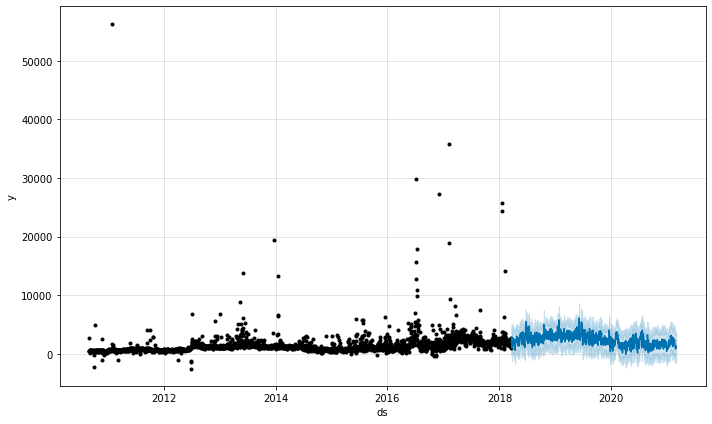

In [105]:
model.plot(forecast_3)
plt.show()

In [106]:
def Metric(y_true,y_pred):
    y_true,y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true)) *100
MAPE = Metric(Test_set['y'],forecast_3['yhat'])
round(MAPE,2)

235.13